<a href="https://colab.research.google.com/github/JarvisSan22/JC_learn_python_Notebooks/blob/main/TJC_CV2_resize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** [GIT HUB ](https://github.com/JarvisSan22/JC_learn_python_Notebooks)**

* [日本語版の記事]()


In [45]:
COLAB=False
if COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    !git clone https://github.com/JarvisSan22/Jinlabs_learn_python_Notebooks
    import sys,os
    sys.path.append("content/Jinlabs_learn_python_Notebooks")
    FILE_LOC="content/Jinlabs_learn_python_Notebooks/CV2"


    def upload_file(): 
        from google.colab import files 
        uploaded = files.upload() 
        for k, v in uploaded.items(): 
            open(k, 'wb').write(v) 
        return list(uploaded.keys())[0] 

else:
    FILE_LOC="./"


In [5]:
os.listdir(FILE_LOC)

['doge.jpg',
 'ssd_T8_img_009.jpg',
 'ssd_T8_mask_009.png',
 'TJC_CV2_resize.ipynb']

Text(0.5, 1.0, 'Resize fx 0.5 fy 0.5')

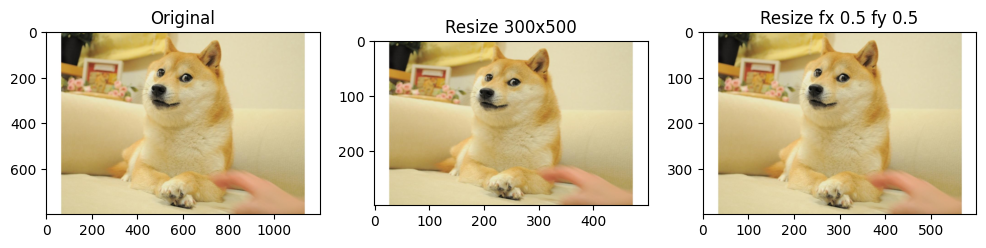

In [85]:
import matplotlib.pyplot as plt
import cv2
img=cv2.imread("doge.jpg")[:,:,::-1]
#Resize D Size 
img_ds=cv2.resize(img,(500,300)) # ( X, Y)
#Resize xf yf
img_fs=cv2.resize(img,None,fx=0.5,fy=0.5)

fig,axs=plt.subplots(1,3,figsize=(12,8))
axs[0].imshow(img)
axs[0].set_title("Original")

axs[1].imshow(img_ds)
axs[1].set_title("Resize 300x500")

axs[2].imshow(img_fs)
axs[2].set_title("Resize fx 0.5 fy 0.5")



In [86]:
import datetime
start=datetime.datetime.now()
start.strftime('%S.%f')

'53.712077'

 # Test Interpolation 
 

In [87]:
from datetime import datetime

def plot_resize_test(img_h,resize):
  dim_h=img_h.shape
  #resizeのオプション
  interpolations=["ORIGINAL",cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
  interpolation_names=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
  fig,axs=plt.subplots(3,2,figsize=(10,15))
  axs=axs.reshape(-1)
  
  out_dic={}

  for ax,inter in zip(axs,interpolations):

    if inter == "ORIGINAL":
      ax.imshow(img_h)
      ax.set_title("ORIGINAL")
      out_dic["ORIGINAL"]=[1,img_h]
    
    else:
      start=datetime.now()
      img_pl_resize=cv2.resize(img_h,resize,interpolation=inter)
      end=datetime.now()
      print(dim_h,img_pl_resize.shape)
      p_time=end-start
     # p_time=p_time #.strftime('%S.%f')
      print(p_time)

      
      ax.imshow(img_pl_resize)
      ax.set_title(interpolation_names[inter]+ f"\n process_time (s): {str(p_time).split(':')[-1]}")
  
    fig.tight_layout()

(800, 1200, 3)
(800, 1200, 3) (80, 120, 3)


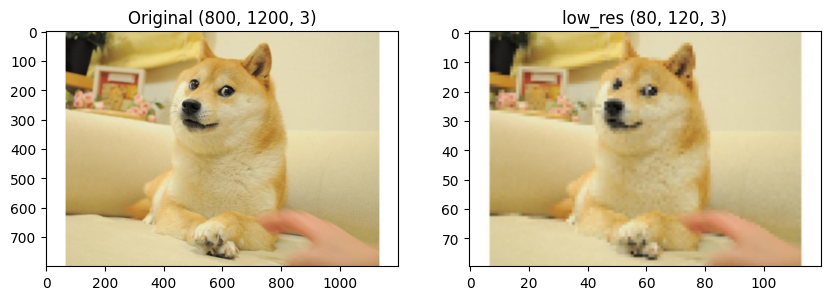

In [88]:


dim=img.shape
print(dim)
scale=10
resize_down=(dim[1]//scale,dim[0]//scale) #downsize to test
img_low=cv2.resize(img,(resize_down))
print(dim,img_low.shape)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
ax1.imshow(img)
ax1.set_title(f'Original {dim}')
ax2.imshow(img_low)
ax2.set_title(f'low_res {img_low.shape}')
plt.show()



(800, 1200, 3) (80, 120, 3)
0:00:00.003001
(800, 1200, 3) (80, 120, 3)
0:00:00.003639
(800, 1200, 3) (80, 120, 3)
0:00:00.005009
(800, 1200, 3) (80, 120, 3)
0:00:00.004008
(800, 1200, 3) (80, 120, 3)
0:00:00.003995


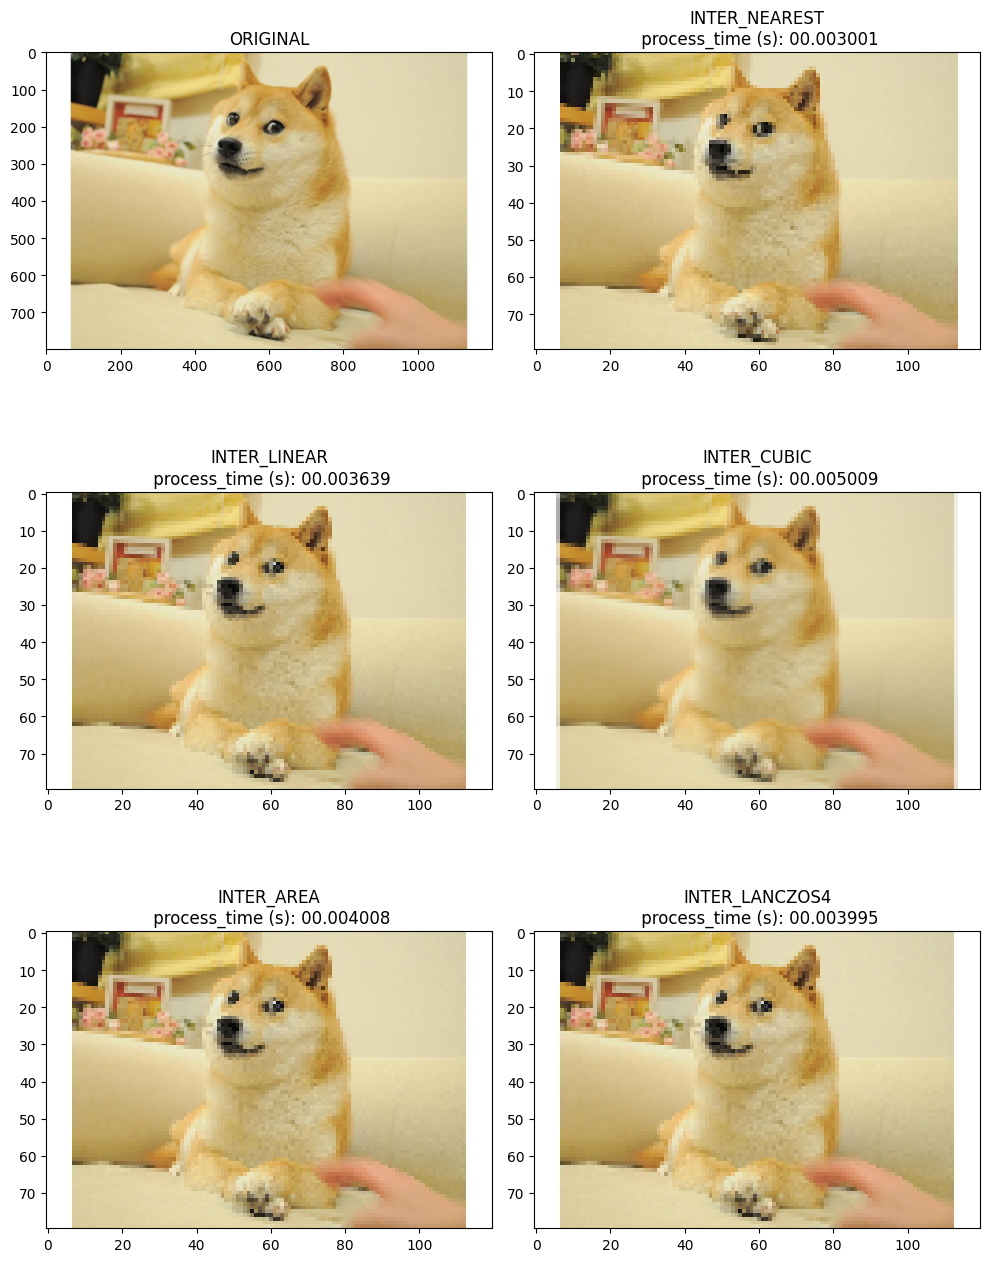

In [89]:
plot_resize_test(img,(120,80))

マスクのデータ

In [90]:
import json
json_data = json.load(open(FILE_LOC+"doge_json.json"))

In [91]:
label_dic={"Body":1,"Eye":2,"Nose":3}
img_mask=np.zeros_like(img[:,:,0])
for id_l, items in json_data["doge.jpg"]["regions"].items():
    print(id_l,len(items["shape_attributes"]))
    x_vals=items["shape_attributes"]["all_points_x"]
    y_vals=items["shape_attributes"]["all_points_y"]
    coors_xy= np.array([x_vals,y_vals]) 
    pixel_loc_xy = np.floor(coors_xy).T 
    val=label_dic[items["region_attributes"]["label"]]
    img_mask = cv2.fillPoly(img_mask, np.int32([pixel_loc_xy]), val) 

0 3
1 3
2 3
3 3


True

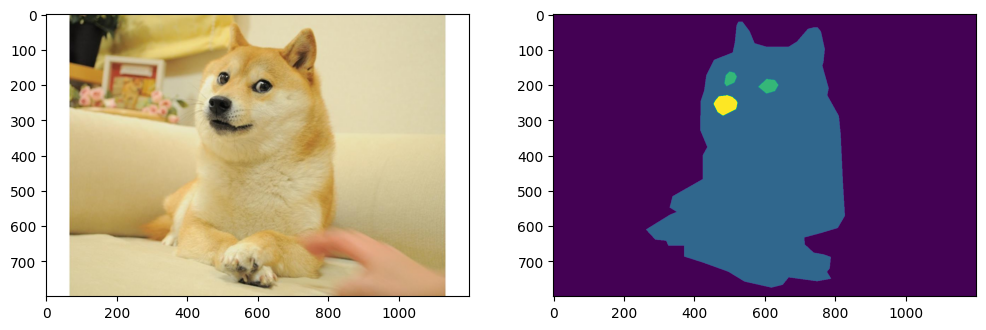

In [92]:
fig,axs=plt.subplots(1,2,figsize=(12,8))
axs[0].imshow(img)
axs[1].imshow(img_mask)
cv2.imwrite("doge_mask.png",img_mask)

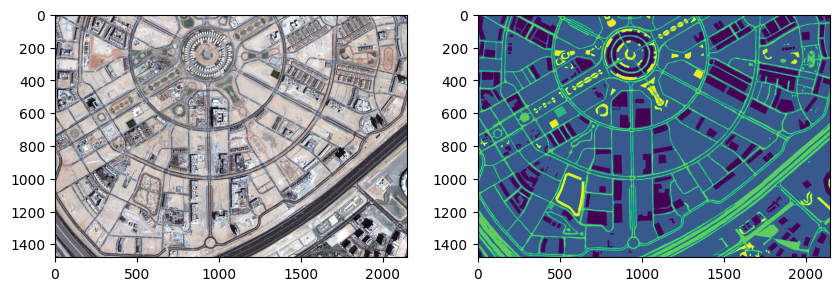

In [53]:
import numpy as np
sat_img=cv2.imread(FILE_LOC+"ssd_T8_img_009.jpg")
sat_mask=cv2.imread(FILE_LOC+"ssd_T8_mask_009.png",0)

fig,axs=plt.subplots(1,2,figsize=(10,6))
axs[0].imshow(sat_img)
axs[1].imshow(sat_mask)

In [80]:
sat_mask.shape

(1479, 2149)

0:00:00
0:00:00
0:00:00.001990
0:00:00
0:00:00.001000


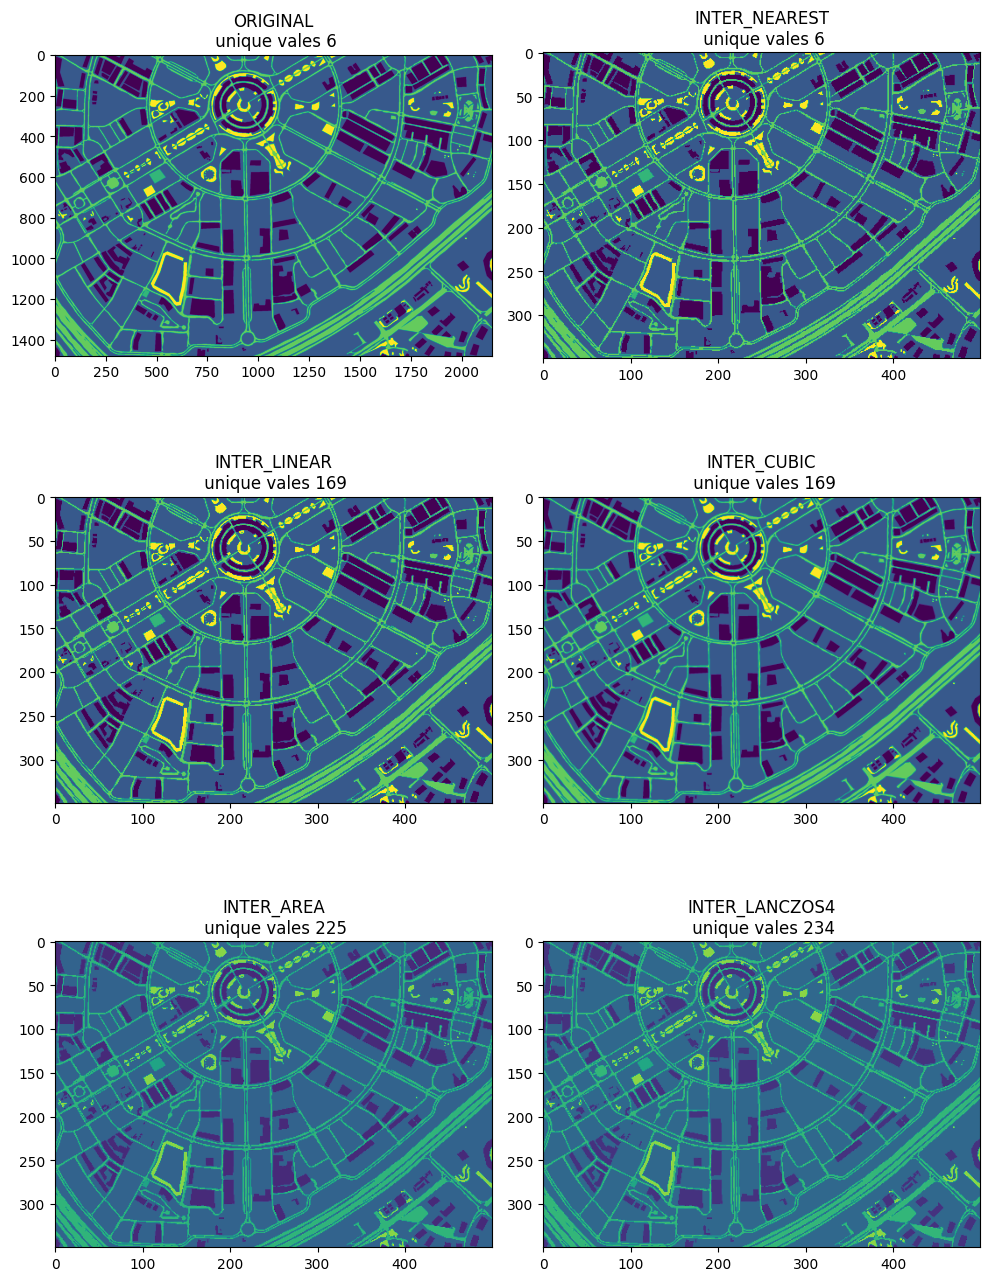

In [79]:
interpolations=["ORIGINAL",cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
interpolation_names=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
fig,axs=plt.subplots(3,2,figsize=(10,15))
axs=axs.reshape(-1)
resize=(500,350)
out_dic={}

img_mask=sat_mask
for ax,inter in zip(axs,interpolations):

    if inter == "ORIGINAL":
        ax.imshow(img_mask)
        ax.set_title("ORIGINAL"+ f"\n unique vales {len(np.unique(img_mask))}")
       

    else:
        start=datetime.now()
        mask_resize=cv2.resize(img_mask,resize,interpolation=inter)
        end=datetime.now()

        p_time=end-start
        # p_time=p_time #.strftime('%S.%f')
        print(p_time)

        
        ax.imshow(mask_resize)
        ax.set_title(interpolation_names[inter]+ f"\n unique vales {len(np.unique(mask_resize))}")

    fig.tight_layout()